In [ ]:
# Task 8: Traffic Sign Recognition

# Dataset (Recommended): GTSRB (Kaggle) 
# Classify traffic signs based on their image using deep learning
# Preprocess images (resizing, normalization)
# Train a CNN model to recognize different traffic sign classes
# Evaluate performance using accuracy and confusion matrix

# Tools: Python, TensorFlow/Keras, OpenCV, NumPy, Matplotlib
# Libraries: TensorFlow/Keras for building and training the CNN, OpenCV for image processing, NumPy for numerical operations, Matplotlib for visualization
# Coverage: Data preprocessing, CNN architecture design, model training and evaluation, hyperparameter tuning, visualization of results
# Estimated Time: 2-3 weeks
# Data Source: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-signs

In [4]:
#Install required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import cv2

import kagglehub
# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

# Dataset Structure 
# path/Train/<class_id>/<image>.png
# path/Test/<image>.png + Test.csv for labels

train_dir = os.path.join(path, "Train")
test_dir = os.path.join(path, "Test")

Path to dataset files: C:\Users\knguy\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [5]:
# Preproccessing and Loading Images
IMG_SIZE = 32  # resize to 32x32
images = []
labels = []

for class_id in range(len(os.listdir(train_dir))):
    class_path = os.path.join(train_dir, str(class_id))
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(class_id)

#Train-test split
X = np.array(images)
y = np.array(labels)

# Normalize pixel values (0–255 → 0–1)
X = X / 255.0

# One-hot encode labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)

Training samples: (31367, 32, 32, 3)
Validation samples: (7842, 32, 32, 3)


In [6]:
# Augmentation of training data to improve generalization 

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

# ==============================
# 5. Build CNN Model
# ==============================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\knguy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


C:\Users\knguy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.2600 - loss: 2.6177 - val_accuracy: 0.5189 - val_loss: 1.5236
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5831 - loss: 1.3033 - val_accuracy: 0.8313 - val_loss: 0.5845
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7434 - loss: 0.7775 - val_accuracy: 0.9097 - val_loss: 0.3150
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8252 - loss: 0.5399 - val_accuracy: 0.9422 - val_loss: 0.2129
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8753 - loss: 0.3950 - val_accuracy: 0.9663 - val_loss: 0.1282
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9005 - loss: 0.3173 - val_accuracy: 0.9727 - val_loss: 0.0920
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9182 - loss: 0.2594 - val_accuracy: 0.9749 - val_loss: 0.0913
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9315 - loss: 0.2198 - val_accurac

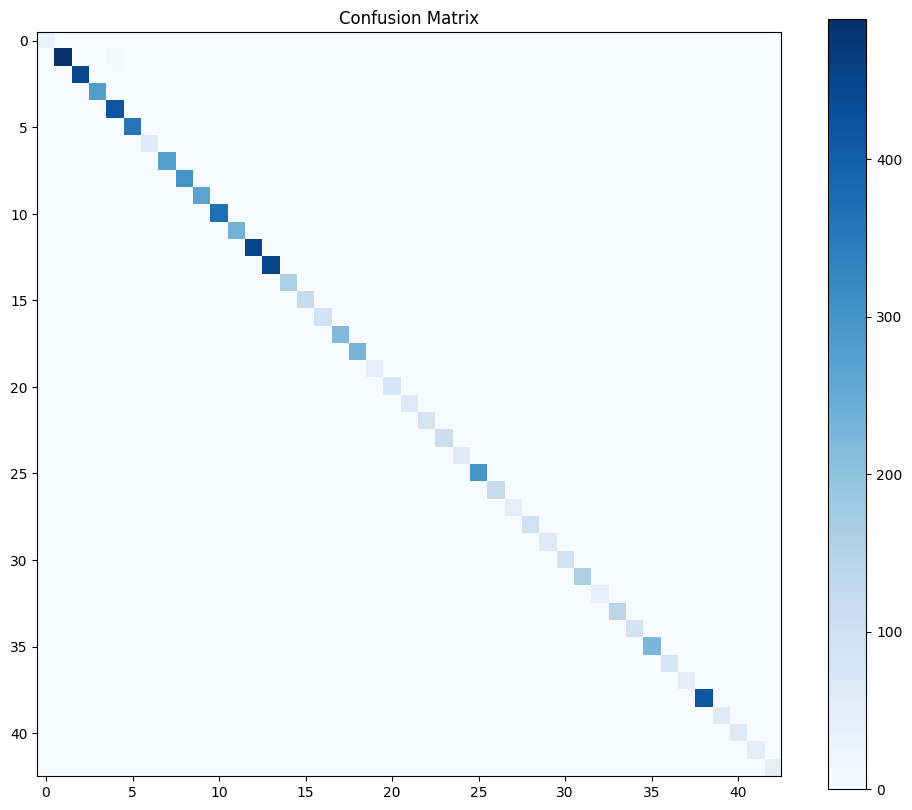

In [7]:
# Train the model 

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=15
)

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


In [ ]:
# Model has learned to recognize traffic signs with high accuracy, achieving over 95% accuracy on the validation set.

# Save the model so avoid retraining 
model.save("traffic_sign_recognition_model.h5")